In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 수집 및 전처리
## 데이터 수집
- 국토교통부 실거래가 공개시스템<br>
    http://rtdown.molit.go.kr/

In [3]:
df = pd.read_csv('../data/아파트(매매)__실거래가_20220608063909.csv')
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,202203,7,"18,000",3,1997.0,경강로2539번길 8,NaN,중개거래,강원 강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,59.800,202203,8,"21,000",8,1997.0,경강로2539번길 8,NaN,중개거래,강원 강릉시
2,강원도 강릉시 견소동,202,202,0,송정한신,84.945,202203,26,"25,500",10,1997.0,경강로2539번길 8,NaN,중개거래,강원 강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,202203,14,"33,500",1,2005.0,경강로2539번길 22,NaN,중개거래,강원 강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,59.990,202203,18,"27,000",13,2005.0,경강로2539번길 22,NaN,중개거래,강원 강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31388,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,99.870,202203,12,"55,500",4,2019.0,호암토성2로 1,20220419.0,중개거래,충북 충주시
31389,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,120.490,202203,18,"69,000",19,2019.0,호암토성2로 1,NaN,직거래,-
31390,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.950,202203,19,"47,800",20,2019.0,호암토성2로 1,NaN,중개거래,충북 충주시
31391,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.890,202203,26,"48,800",24,2019.0,호암토성2로 1,NaN,중개거래,충북 충주시


## 데이터 전처리
### 해제사유발생일
- 해제사유 발생일:계약이 해지된 것에 대한 해지일

In [4]:
# 해제사유 발생일이 존재하는 데이터 삭제
df = df.drop(index=df[df['해제사유발생일'].notnull()].index)

In [5]:
df[df['해제사유발생일'].notnull()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지


### 사용할 컬럼만 추출
- 시군구, 전용면적(㎡), 거래금액(만원)

In [6]:
df = df[['시군구', '전용면적(㎡)', '거래금액(만원)']]
df.head()

,시군구,전용면적(㎡),거래금액(만원)
0,강원도 강릉시 견소동,59.800,"18,000"
1,강원도 강릉시 견소동,59.800,"21,000"
2,강원도 강릉시 견소동,84.945,"25,500"
3,강원도 강릉시 견소동,84.990,"33,500"
4,강원도 강릉시 견소동,59.990,"27,000"


### 자료형 확인 및 변경

In [7]:
df.dtypes

시군구          object
전용면적(㎡)     float64
거래금액(만원)     object
dtype: object

In [8]:
# 전용면적: int(소수점 무시)
df['전용면적(㎡)'] = df['전용면적(㎡)'].astype('int64')

In [9]:
# 거래금액 : int
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','').astype('int64')

In [10]:
df.dtypes

시군구         object
전용면적(㎡)      int64
거래금액(만원)     int64
dtype: object

# 시도별 아파트 매매가 데이터 추출
## 시도 컬럼 추가

In [15]:
df['시도']=df['시군구'].str.split().str[0]

In [17]:
df['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [18]:
df['시도'].nunique()

17

## 분석할 전용면적 선택

In [20]:
df['전용면적(㎡)'].value_counts()

84     7900
59     7720
49     1659
39      911
74      465
       ... 
242       1
210       1
194       1
237       1
207       1
Name: 전용면적(㎡), Length: 208, dtype: int64

## 분석할 전용면적 서브셋

In [24]:
df_84 = df[df['전용면적(㎡)']==84].copy()
df_84

,시군구,전용면적(㎡),거래금액(만원),시도
2,강원도 강릉시 견소동,84,25500,강원도
3,강원도 강릉시 견소동,84,33500,강원도
5,강원도 강릉시 견소동,84,37400,강원도
10,강원도 강릉시 교동,84,34900,강원도
12,강원도 강릉시 교동,84,35000,강원도
...,...,...,...,...
31385,충청북도 충주시 호암동,84,47000,충청북도
31386,충청북도 충주시 호암동,84,45500,충청북도
31387,충청북도 충주시 호암동,84,47000,충청북도
31390,충청북도 충주시 호암동,84,47800,충청북도


## 시도별 평균,최대,최소,중간값 추출

In [27]:
df_84_mean = df_84.groupby('시도')['거래금액(만원)'].mean()
df_84_mean

시도
강원도         25727.540881
경기도         55887.173077
경상남도        26621.671193
경상북도        23303.853270
광주광역시       36243.975904
대구광역시       37685.112782
대전광역시       44409.128834
부산광역시       42551.656250
서울특별시      129258.150943
세종특별자치시     66308.333333
울산광역시       34001.910112
인천광역시       49092.710317
전라남도        24269.716567
전라북도        25423.866171
제주특별자치도     40630.625000
충청남도        25984.765217
충청북도        26317.167070
Name: 거래금액(만원), dtype: float64

In [28]:
df_84_max = df_84.groupby('시도')['거래금액(만원)'].max()
df_84_max

시도
강원도         64500
경기도        194000
경상남도        95000
경상북도        64000
광주광역시       98200
대구광역시      110000
대전광역시       97000
부산광역시      140000
서울특별시      380000
세종특별자치시     90000
울산광역시      107500
인천광역시      100000
전라남도        57000
전라북도        63000
제주특별자치도     95000
충청남도        86800
충청북도        58000
Name: 거래금액(만원), dtype: int64

In [29]:
df_84_min = df_84.groupby('시도')['거래금액(만원)'].min()
df_84_min

시도
강원도         8900
경기도         6000
경상남도        4950
경상북도        4100
광주광역시      12000
대구광역시      14800
대전광역시      14950
부산광역시       9700
서울특별시      33700
세종특별자치시    27000
울산광역시       7800
인천광역시      19000
전라남도        3400
전라북도        5700
제주특별자치도    12100
충청남도        7800
충청북도        5800
Name: 거래금액(만원), dtype: int64

In [30]:
df_84_median = df_84.groupby('시도')['거래금액(만원)'].median()
df_84_median

시도
강원도         23500
경기도         49200
경상남도        24000
경상북도        21500
광주광역시       32200
대구광역시       34000
대전광역시       41500
부산광역시       34000
서울특별시      111500
세종특별자치시     70000
울산광역시       32500
인천광역시       43600
전라남도        23400
전라북도        20600
제주특별자치도     37000
충청남도        24500
충청북도        24000
Name: 거래금액(만원), dtype: int64

In [33]:
df_84_price = pd.concat([df_84_mean, df_84_max, df_84_min, df_84_median], axis=1)
df_84_price

,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
시도,,,,
강원도,25727.540881,64500,8900,23500
경기도,55887.173077,194000,6000,49200
경상남도,26621.671193,95000,4950,24000
경상북도,23303.853270,64000,4100,21500
광주광역시,36243.975904,98200,12000,32200
대구광역시,37685.112782,110000,14800,34000
대전광역시,44409.128834,97000,14950,41500
부산광역시,42551.656250,140000,9700,34000
서울특별시,129258.150943,380000,33700,111500


In [37]:
df_84_price.columns=['평균','최대','최소','중간']

In [39]:
df_84_price = df_84_price.sort_values('평균', ascending=False)

In [43]:
df_84_price['평균']=round(df_84_price['평균'], 1)
df_84_price

,평균,최대,최소,중간
시도,,,,
서울특별시,129258.2,380000,33700,111500
세종특별자치시,66308.3,90000,27000,70000
경기도,55887.2,194000,6000,49200
인천광역시,49092.7,100000,19000,43600
대전광역시,44409.1,97000,14950,41500
부산광역시,42551.7,140000,9700,34000
제주특별자치도,40630.6,95000,12100,37000
대구광역시,37685.1,110000,14800,34000
광주광역시,36244.0,98200,12000,32200


# 시도별 아파트 매매가 현황 시각화
- 다중 막대 그래프

In [54]:
import numpy as np
x_index = np.arange(1,len(df_84_price)+1)

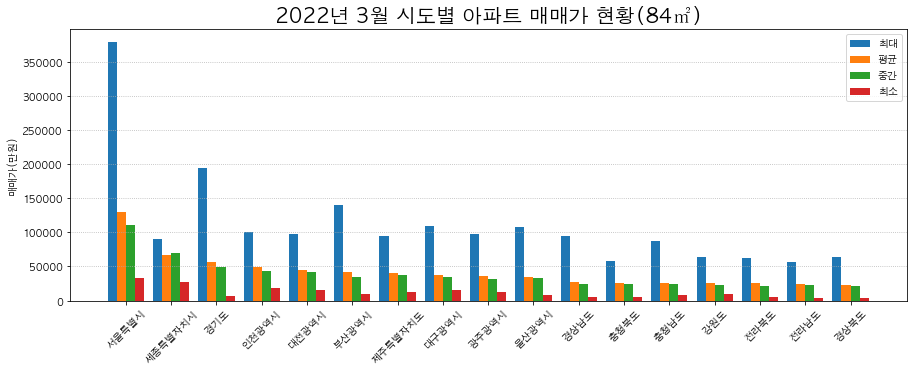

In [66]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(x_index-0.3, df_84_price['최대'], width=0.2, label='최대')
plt.bar(x_index-0.1, df_84_price['평균'], width=0.2, label='평균')
plt.bar(x_index+0.1, df_84_price['중간'], width=0.2, label='중간')
plt.bar(x_index+0.3, df_84_price['최소'], width=0.2, label='최소')
plt.legend()
plt.xticks(x_index, labels=df_84_price.index, rotation=45)
plt.grid(axis='y',ls=':')
plt.title('2022년 3월 시도별 아파트 매매가 현황(84㎡)', size=20)
plt.ylabel('매매가(만원)')
plt.show()

# 서울시 아파트 매매가 분포
## 서울시 서브셋

In [71]:
df_84_seoul = df_84[df_84['시도']=='서울특별시'].copy()
df_84_seoul

,시군구,전용면적(㎡),거래금액(만원),시도
19088,서울특별시 강남구 개포동,84,265000,서울특별시
19092,서울특별시 강남구 논현동,84,180000,서울특별시
19108,서울특별시 강남구 도곡동,84,313000,서울특별시
19110,서울특별시 강남구 도곡동,84,210000,서울특별시
19114,서울특별시 강남구 도곡동,84,232000,서울특별시
...,...,...,...,...
20528,서울특별시 중랑구 면목동,84,55500,서울특별시
20529,서울특별시 중랑구 면목동,84,113000,서울특별시
20534,서울특별시 중랑구 묵동,84,68500,서울특별시
20542,서울특별시 중랑구 상봉동,84,76000,서울특별시


## 구 컬럼 추가

In [74]:
df_84_seoul['구']=df_84_seoul['시군구'].str.split().str[1]
df_84_seoul

,시군구,전용면적(㎡),거래금액(만원),시도,구
19088,서울특별시 강남구 개포동,84,265000,서울특별시,강남구
19092,서울특별시 강남구 논현동,84,180000,서울특별시,강남구
19108,서울특별시 강남구 도곡동,84,313000,서울특별시,강남구
19110,서울특별시 강남구 도곡동,84,210000,서울특별시,강남구
19114,서울특별시 강남구 도곡동,84,232000,서울특별시,강남구
...,...,...,...,...,...
20528,서울특별시 중랑구 면목동,84,55500,서울특별시,중랑구
20529,서울특별시 중랑구 면목동,84,113000,서울특별시,중랑구
20534,서울특별시 중랑구 묵동,84,68500,서울특별시,중랑구
20542,서울특별시 중랑구 상봉동,84,76000,서울특별시,중랑구


In [76]:
df_84_seoul['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [77]:
df_84_seoul['구'].nunique()

25

## 박스플롯으로 시각화
### 구별 데이터 분리

In [78]:
# 구이름
seoul_gu = df_84_seoul['구'].unique()
seoul_gu

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [86]:
df_seoul_gu = []
for i in seoul_gu:
    df_seoul_gu.append(df_84_seoul.groupby('구')['거래금액(만원)'].get_group(i))

### 박스플롯으로 시각화

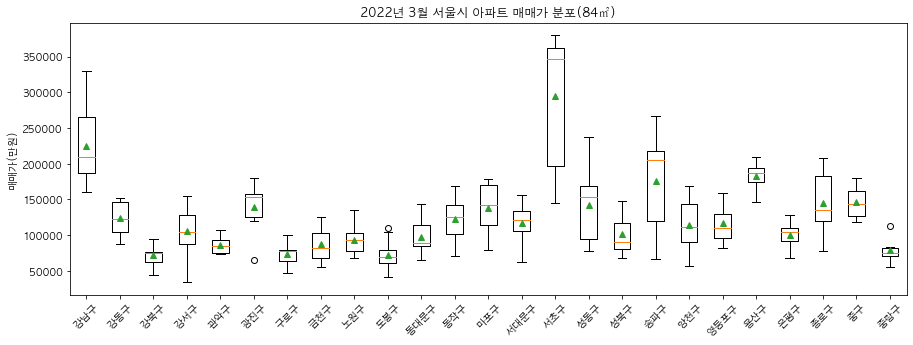

In [95]:
plt.boxplot(df_seoul_gu, labels=seoul_gu, showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('매매가(만원)')
plt.title('2022년 3월 서울시 아파트 매매가 분포(84㎡)')
plt.show()

#  서울시 아파트 구별 평균 매매가, 거래건수
## 서울시 아파트 구별 평균 매매가

In [98]:
df_84_seoul_mean = df_84_seoul.groupby('구')['거래금액(만원)'].mean()
df_84_seoul_mean = round(df_84_seoul_mean,1)
df_84_seoul_mean

구
강남구     224873.1
강동구     123581.2
강북구      71666.7
강서구     105427.8
관악구      86028.6
광진구     139375.0
구로구      74114.3
금천구      87166.7
노원구      93545.5
도봉구      72363.6
동대문구     97453.5
동작구     122406.2
마포구     137562.5
서대문구    117125.0
서초구     294400.0
성동구     142155.6
성북구     101515.4
송파구     175938.9
양천구     114265.0
영등포구    116490.0
용산구     182375.0
은평구     100685.7
종로구     144916.7
중구      145875.0
중랑구      78450.0
Name: 거래금액(만원), dtype: float64

## 서울시 아파트 구별 거래건수

In [102]:
df_84_seoul_count = df_84_seoul.groupby('구')['거래금액(만원)'].count()
df_84_seoul_count.sort_values()

구
금천구      3
용산구      4
중구       4
중랑구      6
종로구      6
은평구      7
관악구      7
마포구      8
광진구      8
강북구      9
성동구      9
영등포구    10
양천구     10
노원구     11
도봉구     11
서대문구    12
성북구     13
강남구     13
구로구     14
서초구     15
동작구     16
강동구     16
동대문구    17
송파구     18
강서구     18
Name: 거래금액(만원), dtype: int64

In [105]:
df_84_seoul_mean_count = pd.concat([df_84_seoul_mean, df_84_seoul_count], axis=1)
df_84_seoul_mean_count

,거래금액(만원),거래금액(만원)
구,,
강남구,224873.1,13
강동구,123581.2,16
강북구,71666.7,9
강서구,105427.8,18
관악구,86028.6,7
광진구,139375.0,8
구로구,74114.3,14
금천구,87166.7,3
노원구,93545.5,11


In [110]:
df_84_seoul_mean_count.columns=['평균매매가(만원)','거래건수']
df_84_seoul_mean_count=df_84_seoul_mean_count.sort_values('평균매매가(만원)', ascending=False)
df_84_seoul_mean_count

,평균매매가(만원),거래건수
구,,
서초구,294400.0,15
강남구,224873.1,13
용산구,182375.0,4
송파구,175938.9,18
중구,145875.0,4
종로구,144916.7,6
성동구,142155.6,9
광진구,139375.0,8
마포구,137562.5,8


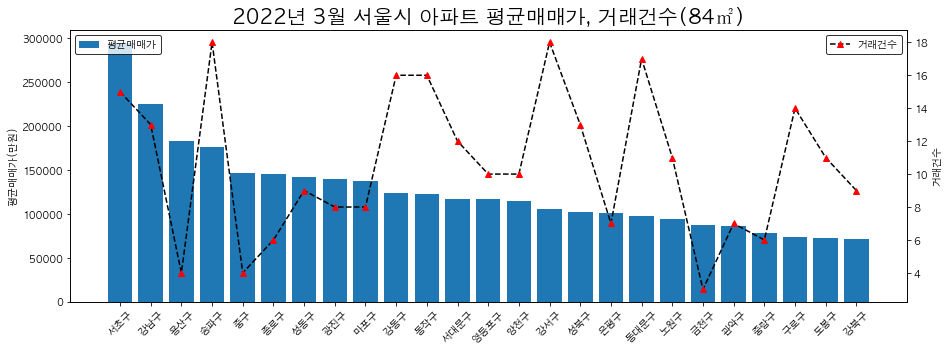

In [130]:
fig, ax1 = plt.subplots()
ax1.bar(df_84_seoul_mean_count.index, df_84_seoul_mean_count['평균매매가(만원)'], label='평균매매가')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_84_seoul_mean_count['거래건수'], 'k^--',mfc='r',mec='r', label='거래건수')

ax1.legend(loc='upper left', edgecolor='k')
ax2.legend(loc='upper right', edgecolor='k')

ax1.set_ylabel('평균매매가(만원)')
ax2.set_ylabel('거래건수')

plt.title('2022년 3월 서울시 아파트 평균매매가, 거래건수(84㎡)', size=20)
plt.show()